In [160]:
# 주식 데이터 수집 라이브러리 설치
# !pip install -U finance-datareader

## FinanceDataReader
* 금융 데이터 수집을 위한 라이브러리
* FinanceDataReader를 이용하여 수집할 수 있는 데이터
  * 거래소 별 상장종목 목록
  * 국내외 주식 데이터 : 국내주식, 미국주식 및 기타 글로벌 종목
  * 국내외 주가 지수 : KOSPI, KOSDAQ, S&P 500, NASDAQ, DOW,니케이225, 항셍 지수 등 글로벌 주요 지수
  * 상품선물 : 천연가스 선물, 금 선물, 은 선물, 구리 선물, WTI유 선물
  * 환율 : 달러당 원화 환율, 달러달 유로화 환율, 달러당 루블화 환율 등
  * 채권 수익률 : 1/3/5/10년 만기 한국 국채 수익률, 1/3/5/10년 만기 미국 국채 수익률
  * 암호화폐 가격 : 비트코인 원화/달러 가격, 이더리움 원화/달러 가격, 리플 원화/달러 가격 등
* 사용하는 함수는 아래 두가지이며, 분석할 데이터를 불러오는 데 사용하는 함수는 DataReader 한가지이다.
  * **`DataReader(symbol, startdate, enddate)`**
    * symbol : 수집 대상 코드
    * startdate : 수집 시작 날짜
    * enddate : 수집 종료 날짜
  * **`StockListing(market)`**
    * 거래소 별 상장 종목 목록을 가져오는 함수

* 데이터 제공 형식
  * 일별 데이터: 시가, 고가, 저가, 종가, 거래량
  * 시계열 데이터: DateTime 인덱스


* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

## 라이브러리 import

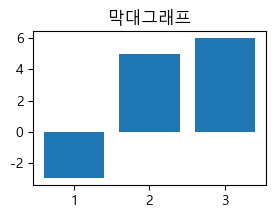

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

# matplotlib 한글폰트 지정
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 한글폰트 테스트
plt.figure(figsize=(3,2))
plt.bar([1,2,3],[-3,5,6])
plt.title('막대그래프')
plt.show()

## 마켓별 상장 종목 정보 수집
* **`fdr.StockListing(마켓코드)`**
* 마켓코드
    * 한국시장
      * `'KRX'` : 한국거래소 전체 상장 기업 목록 (KOSPI+KOSDAQ+KONEX)
      * `'KOSPI'` : 코스피 상장 기업 목록만
      * `'KOSDAQ'` : 코스닥 상장 기업 목록만
      * `'KONEX'` : 코넥스 상장 기업 목록만
      * `'KRX-DELISTING'` : 한국거래소에서 상장폐지된 종목 리스트
    * 해외시장
      * `'NYSE'` : 뉴욕증권거래소 상장 기업 목록
      * `'NASDAQ'` : 나스닥 상장 기업 목록
      * `'AMEX'` : AMEX 종목 상장 기업 목록
      * `'S&P500'` : S&P500 지수 구성 종목 목록
      * `'SSE'` : 상하이 거래소(Shanghai Stock Exchange)
      * `'SZSE'` : 선전거래소(Shenzhen Stock Exchange)
      * `'HKEX'` : 홍콩 거래소(Hong Kong Stock Exchange)
      * `'TSE'` : 도쿄 거래소(Tokyo Stock Exchange)
      * `'HOSE'` : 호찌민 거래소(Ho Chi Minh Stock Exchange)
      
  
* 컬럼정보
    * `Close` : 최종일 기준 종가
    * `Volume`: 최종일 기준 거래량
    * `Amount`: 최종일 기준 거래금액
    * `Stocks`: 상장주식수
    * `Marcap`: 시가총액
* 마켓에 따라 제공되는 정보(컬럼)이 다르다.


In [162]:
fdr.StockListing('KRX').head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,56150,1,3150,5.94,56600,56700,55000,15716481,879641430300,332387669320300,5919637922,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,181600,1,16600,10.06,189700,189900,180000,5335538,984044693700,132205229484000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,336000,1,22000,7.01,335500,343000,326500,406754,136811023250,78624000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1009000,1,17000,1.71,1000000,1030000,998000,101991,102912221500,71814566000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,189600,1,11600,6.52,191700,192900,187800,871600,165830646000,39705309813600,209416191,STK


## 특정 종목에 대한 가격 데이터 수집
* **`fdr.DataReader(코드)`** 
* 일별 데이터 제공
* 날짜가 인덱스로 지정됨
* 수집할 수 있는 데이터 종류
  * 국내주식: '**`005930`**'(삼성전자), '**`091990`**'(셀트리온헬스케어) 등 주식 종목 코드를 이용하여 수집<br>
  * 해외주식: '**`AAPL`**'(애플), '**`AMZN`**'(아마존) 등 주식 종목 코드를 이용하여 수집 <br>
  * 각종 지수
    * 한국 지수
      * '**`KS11`**': 코스피 지수
      * '**`KQ11`**': 코스닥 지수
      * '**`KS200`**': KOSPI 200 지수
    * 미국 지수
      * '**`DJI`**': 다우존스 산업평균지수
      * '**`IXIC`**': 나스닥 종합지수
      * '**`US500`**': S&P 500 지수
      * '**`RUT`**': 러셀 2000 지수
      * '**`VIX`**': 변동성 지수
    * 글로벌 지수
      * '**`SSEC`**': 상해 종합지수
      * '**`HSI`**': 홍콩 항셍지수
      * '**`N225`**': 일본 닛케이225 지수
      * '**`FTSE`**': 영국 FTSE 100 지수
      * '**`FCHI`**': 프랑스 CAC 40 지수
      * '**`GDAXI`**': 독일 DAX 지수
<br>
  * 환율
    * 달러 기준 환율
      * '**`USD/KRW`**': 달러당 원화 환율
      * '**`USD/EUR`**': 달러당 유로화 환율
      * '**`USD/JPY`**': 달러당 엔화 환율
      * '**`USD/CNY`**': 달러당 위엔화 환율
      * '**`USD/RUB`**': 달러당 루블화 환율
    * 기타 통화 환율
      * '**`CNY/KRW`**': 위엔화 원화 환율
      * '**`EUR/USD`**': 유로화 달러 환율
      * '**`JPY/KRW`**': 엔화 원화 환율
      * '**`AUD/USD`**': 호주 달러 환율
      * '**`EUR/JPY`**': 유로화 엔화 환율
      * '**`EUR/CNY`**': 유로화 위엔화 환율
  <br>
  * 채권
    * 한국 국채 수익률
      * '**`KR1YT=RR`**': 1년만기 한국국채
      * '**`KR2YT=RR`**': 2년만기 한국국채
      * '**`KR3YT=RR`**': 3년만기 한국국채
      * '**`KR4YT=RR`**': 4년만기 한국국채
      * '**`KR5YT=RR`**': 5년만기 한국국채
      * '**`KR10YT=RR`**': 10년만기 한국국채
      * '**`KR20YT=RR`**': 20년만기 한국국채
      * '**`KR30YT=RR`**': 30년만기 한국국채
      * '**`KR50YT=RR`**': 50년만기 한국국채8
    * 미국 국채 수익률
      * 단기 국채
        * '**`US1MT=X`**': 1개월만기 미국국채
        * '**`US3MT=X`**': 3개월만기 미국국채
        * '**`US6MT=X`**': 6개월만기 미국국채
      * 장기 국채
        * '**`US1YT=X`**': 1년만기 미국국채
        * '**`US2YT=X`**': 2년만기 미국국채
        * '**`US3YT=X`**': 3년만기 미국국채
        * '**`US5YT=X`**': 5년만기 미국국채
        * '**`US7YT=X`**': 7년만기 미국국채
        * '**`US10YT=X`**': 10년만기 미국국채
        * '**`US30YT=X`**': 30년만기 미국국채
  * 선물
    * 에너지 선물
      * '**`CL=F`**': WTI유 선물 (NYMEX)
      * '**`BZ=F`**': 브렌트유 선물 (NYMEX)
      * '**`NG=F`**': 천연가스 선물 (NYMEX)
    * 금속 선물
      * '**`GC=F`**': 금 선물 (COMEX)
      * '**`SI=F`**': 은 선물 (COMEX)
      * '**`HG=F`**': 구리 선물 (COMEX)
  * 암호화폐
    * 원화(KRW) 거래 가능
      * '**`BTC/KRW`**':비트코인
      * '**`ETH/KRW`**':이더리움
      * '**`XRP/KRW`**':리플
      * '**`BCH/KRW`**':비트코인 캐시
      * '**`USDT/KRW`**':테더
      * '**`BNB/KRW`**':바이낸스 코인
      * '**`USDC/KRW`**':USD 코인
      * '**`ADA/KRW`**':카르다노
      * '**`SOL/KRW`**':솔라나
      * '**`DOGE/KRW`**':도지코인
    * 달러(USD) 거래 가능
      * '**`BTC/USD`**':비트코인
      * '**`ETH/USD`**':이더리움
      * '**`EOS/USD`**':이오스

##  개별 종목 데이터 수집
* `fdr.DataReader(종목코드)`

In [ ]:
# ----------------------------
# 삼성전자 전체 데이터 수집
#   df_005930
# ----------------------------



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 2000-12-14 to 2025-04-10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6000 non-null   int64  
 1   High    6000 non-null   int64  
 2   Low     6000 non-null   int64  
 3   Close   6000 non-null   int64  
 4   Volume  6000 non-null   int64  
 5   Change  5999 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 328.1 KB


DatetimeIndex(['2000-12-14', '2000-12-15', '2000-12-18', '2000-12-19',
               '2000-12-20', '2000-12-21', '2000-12-22', '2000-12-26',
               '2001-01-02', '2001-01-03',
               ...
               '2025-03-28', '2025-03-31', '2025-04-01', '2025-04-02',
               '2025-04-03', '2025-04-04', '2025-04-07', '2025-04-08',
               '2025-04-09', '2025-04-10'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

## 여러종목 종가(Close)를 한번에 수집
* `fdr.DataReader('종목코드,종목코드,...')`
    * 종목코드를 따옴표로 묶어서 한번에 전달


In [ ]:
# -------------------------------------------
# 삼성전자(005930), SK하이닉스(000660)의 종가
#    df_005930_000660
# -------------------------------------------


,005930,000660
Date,,
2000-12-14,3620,132500
2000-12-15,3490,128966
2000-12-18,3560,124255


,005930,000660
Date,,
2025-04-08,53500,169500
2025-04-09,53000,165000
2025-04-10,56150,181800


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6000 entries, 2000-12-14 to 2025-04-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   005930  6000 non-null   int64
 1   000660  6000 non-null   int64
dtypes: int64(2)
memory usage: 140.6 KB


## 기간에 따른 주가 변동 그래프

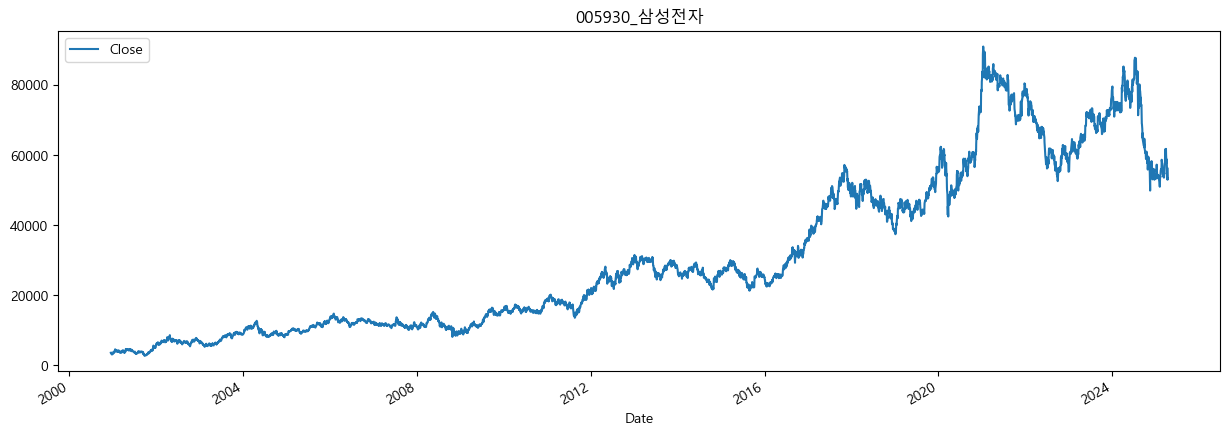

In [ ]:
# --------------------------------
# 전체 기간 Close 시각화
# --------------------------------


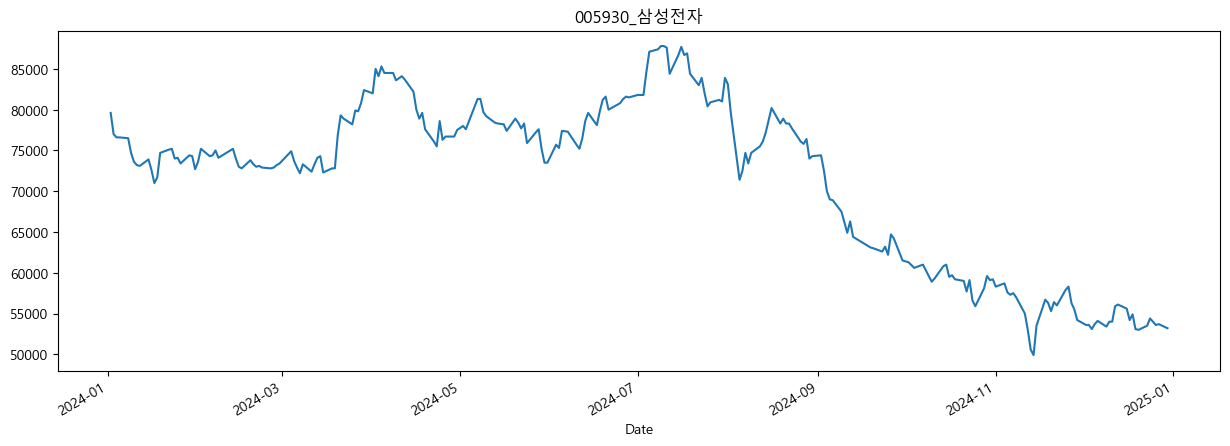

In [ ]:
# --------------------------------
# 2024년 Close 시각화
# --------------------------------


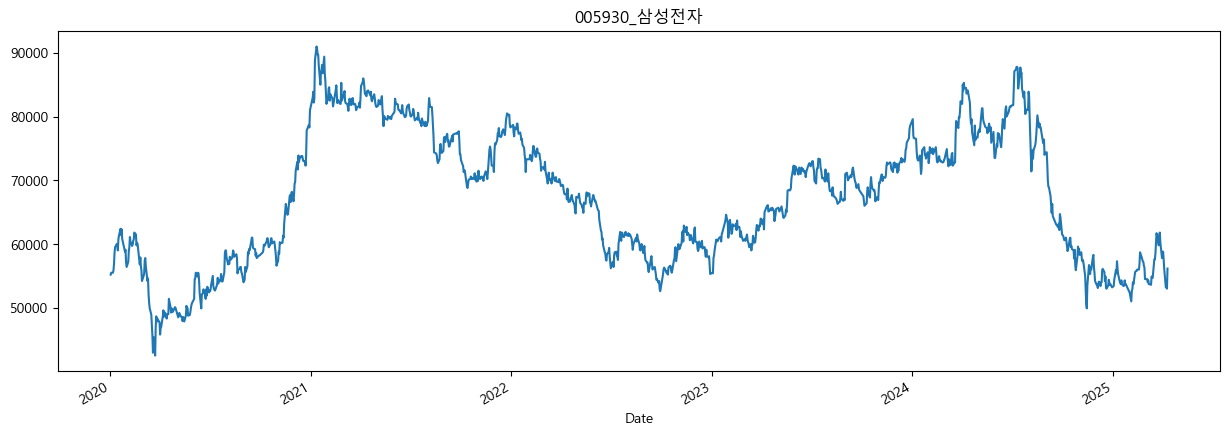

In [ ]:
# --------------------------------
# 2020년~현재 Close 시각화
# --------------------------------


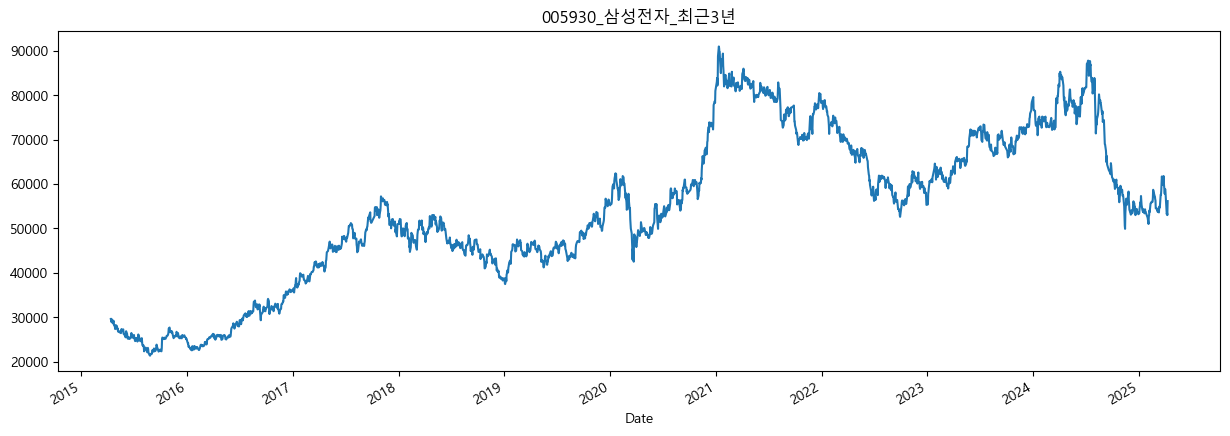

In [ ]:
# --------------------------------
# 최근 1년 시각화
# --------------------------------


## 상관관계

- 삼성전자, 하이닉스 상관관계

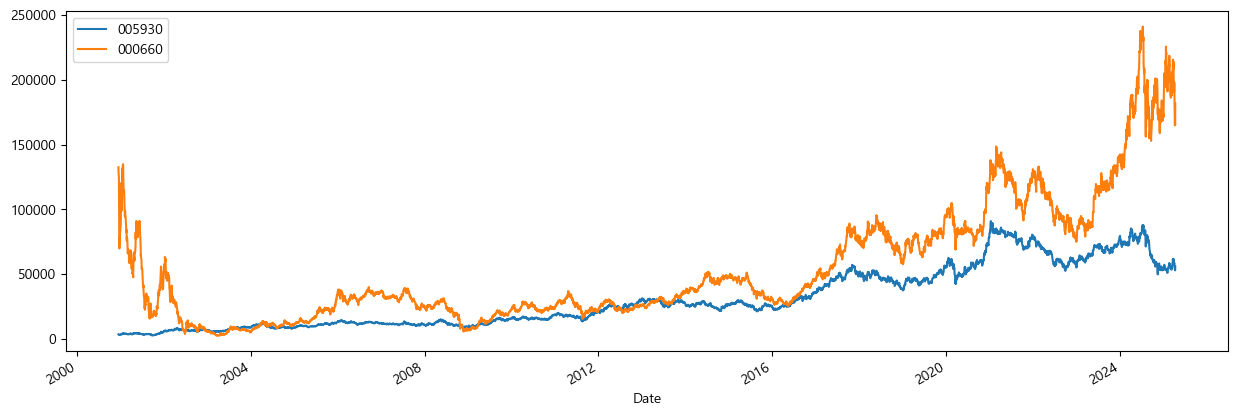

In [ ]:
# ----------------------
# 전체 기간 시각화
# ----------------------


In [ ]:
# ----------------------
# 전체 기간 상관관계
# ----------------------


,005930,000660
005930,1.000000,0.861458
000660,0.861458,1.000000


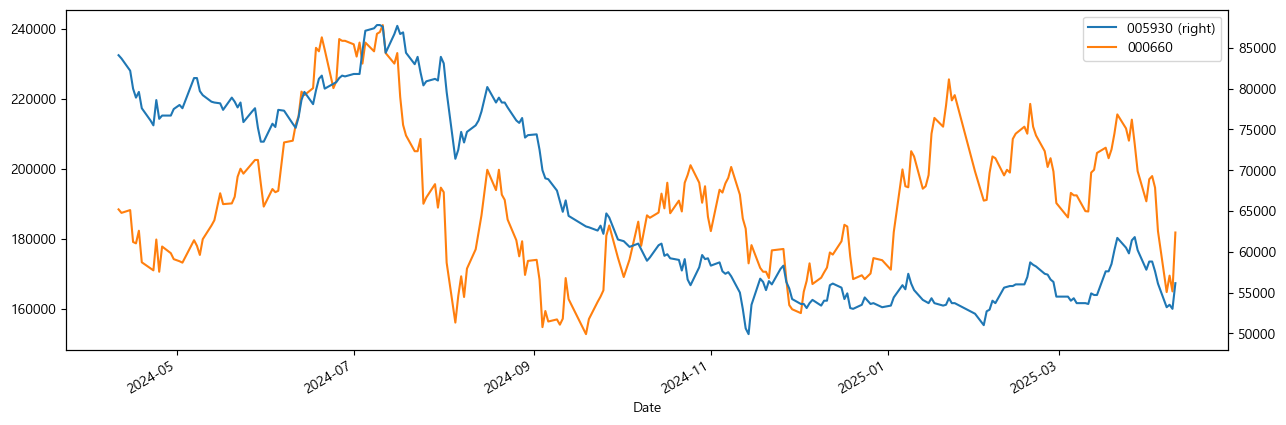

In [ ]:
# ----------------------
# 최근 1년 시각화
# ----------------------


In [ ]:
# ----------------------
# 최근 1년 상관관계
# ----------------------



,005930,000660
005930,1.000000,0.310779
000660,0.310779,1.000000


- 삼성전자, 코스피 상관관계

In [ ]:
# -----------------------------
# 코스피(ks11) 데이터 불러오기
# -----------------------------



,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2001-06-11,612.46,615.41,607.20,608.23,340123834,-0.0218,2,-13.55,1711354887650,213769808029580
2001-06-12,605.36,611.88,603.91,607.15,319877548,-0.0018,2,-1.08,1579309434050,213407866089170
2001-06-13,611.79,614.05,607.48,614.05,392415108,0.0114,1,6.90,1882785913600,215722300556140
2001-06-14,612.96,623.37,610.36,613.75,420520519,-0.0005,2,-0.30,2138122210150,215864633350565
2001-06-15,609.54,618.96,604.37,618.96,375830101,0.0085,1,5.21,1984248114150,217830955673590


In [ ]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) Close 데이터 연결
# -----------------------------


,ks11,005930
Date,,
2001-06-11,608.23,4280
2001-06-12,607.15,4220
2001-06-13,614.05,4280
2001-06-14,613.75,4230
2001-06-15,618.96,4190


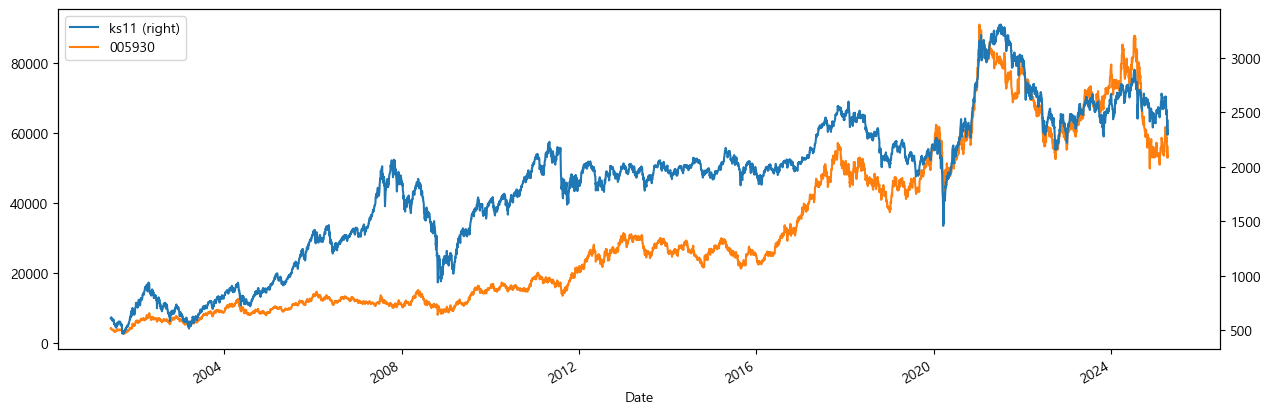

In [ ]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 전체기간 시각화
# -----------------------------


In [ ]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 전체기간 상관관계
# -----------------------------



,ks11,005930
ks11,1.000000,0.875794
005930,0.875794,1.000000


<Axes: xlabel='Date'>

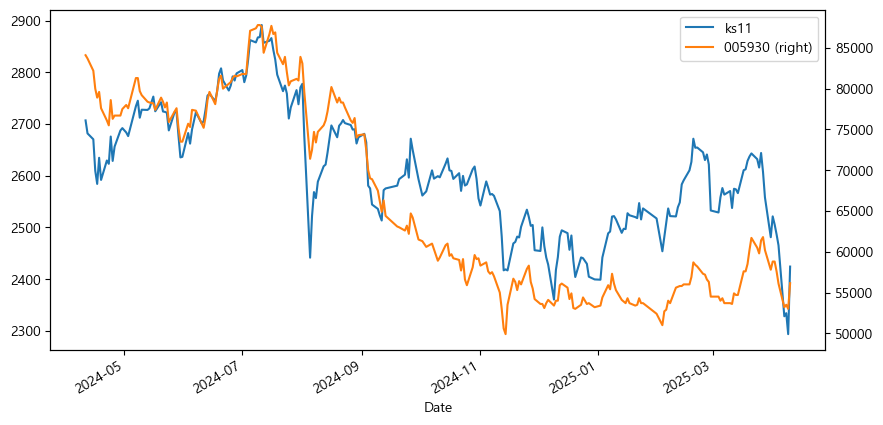

In [ ]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 최근1년 시각화
# -----------------------------


In [ ]:
# -----------------------------
# 코스피(ks11)와 삼성전자(005930) 최근1년 상관관계
# -----------------------------


,ks11,005930
ks11,1.000000,0.863539
005930,0.863539,1.000000


## 이동평균
* SMA(Simple Moving Average, 단순이동평균)
    * 일정 기간동안의 가격 데이터의 평균
    * 모든 데이터포인트에 동일한 가중치 부여
    * 노이즈를 제거하고 추세를 파악하는 데 유용
    * 최신 데이터 반영이 느리다는 단점
* EMA(Exponential Moving Average, 지수이동평균)
    * 최근 데이터에 더 높은 가중치를 부여하여 계산된 이동평균
    * 최신 가격 움직임을 빠르게 반영
    * SMA보다 민감하게 반응하지만, 짧은 기간 설정 시 노이즈가 증가할 수 있음
    * 가중치 
        * $k = \frac{2}{n+1}$
        * $n$ : EMA 기간
    * EMA 업데이트
        * $EMA_{current} = (P_{current} \times k) + (EMA_{previous} \times (1-k))$
        * $P_{current}$ : 현재 가격
        * $EMA_{previous}$ : 이전 EMA 값

### SMA
* Simple Moving Average. 단순이동평균
* `컬럼.rolling(윈도우사이즈).mean()`
* 단기 이동평균 : 빠른 변동성 파악 
    * 5일 : 평일 기준 한 주 동안의 거래일수
    * 10일 
    * 20일 : 평일 기준 월간 거래일수
* 중기 이동평균 : 중기적인 가격 추세와 지지 및 저항 수준 파악 
    * 60일 : 분기(3개월) 기준
    * 100일 
* 장기 이동평균 : 장기적인 시장 흐름 이해 
    * 120일 : 반년단위 
    * 200일  : 1년단위

start_date : 2025-01-10


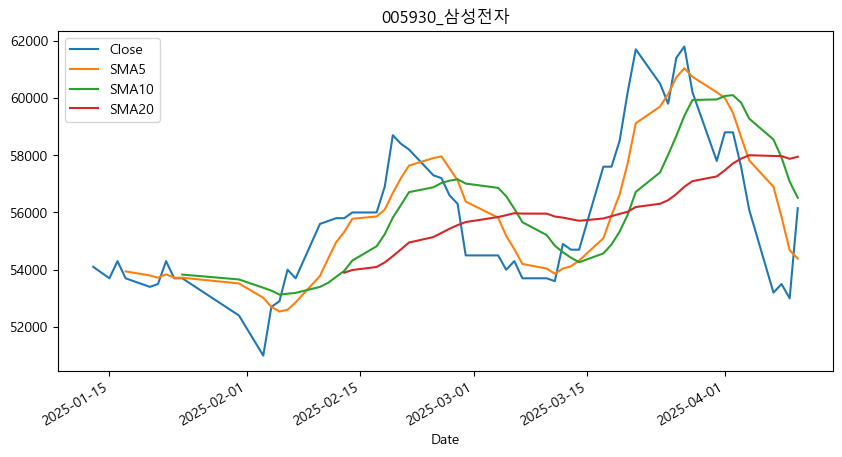

In [ ]:
# --------------------------------
# 최근 3개월 단기 SMA
# Close
# Close 5일 SMA
# Close 10일 SMA
# Close 20일 SMA
# --------------------------------



start_date : 2024-04-10


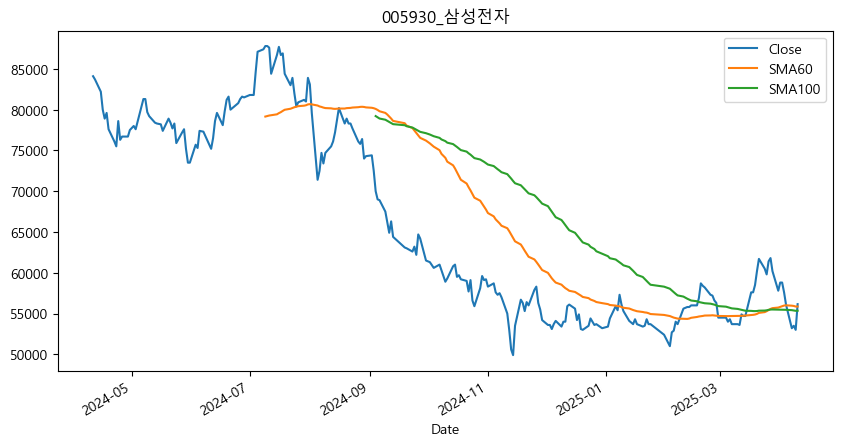

In [ ]:
# --------------------------------
# 최근 1년 중기 SMA
# Close
# Close 50일 SMA
# Close 100일 SMA
# --------------------------------



start_date : 2022-04-10


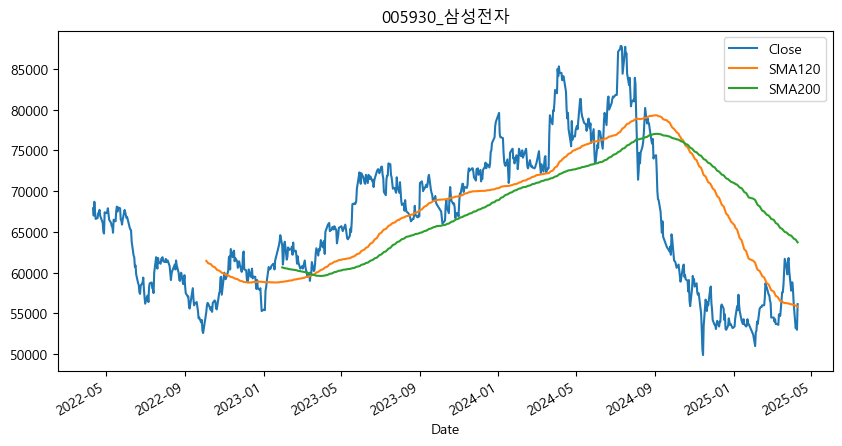

In [ ]:
# --------------------------------
# 최근 3년 장기 이동평균
# Close
# Close 100일 이동평균
# Close 200일 이동평균
# --------------------------------



### EMA
`컬럼.ewm(span=기간, adjust=False).mean()`

start_date : 2025-01-10


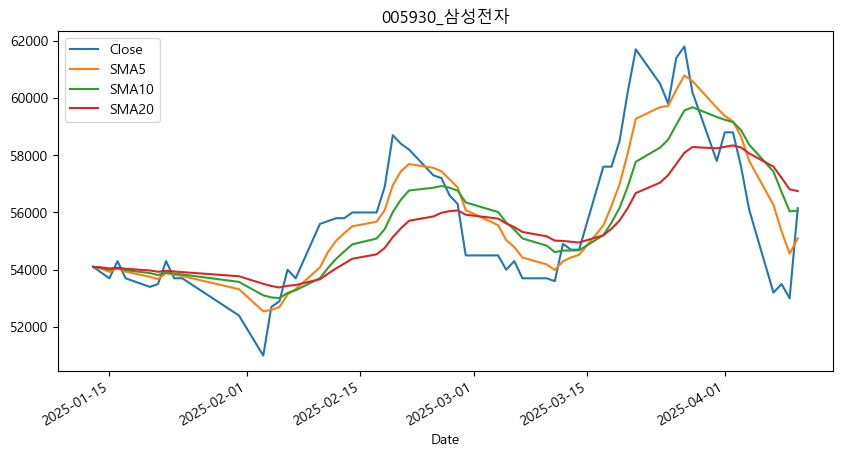

In [ ]:
# --------------------------------
# 최근 3개월 단기 EMA
# Close
# Close 5일 EMA
# Close 10일 EMA
# Close 20일 EMA
# --------------------------------



start_date : 2024-04-10


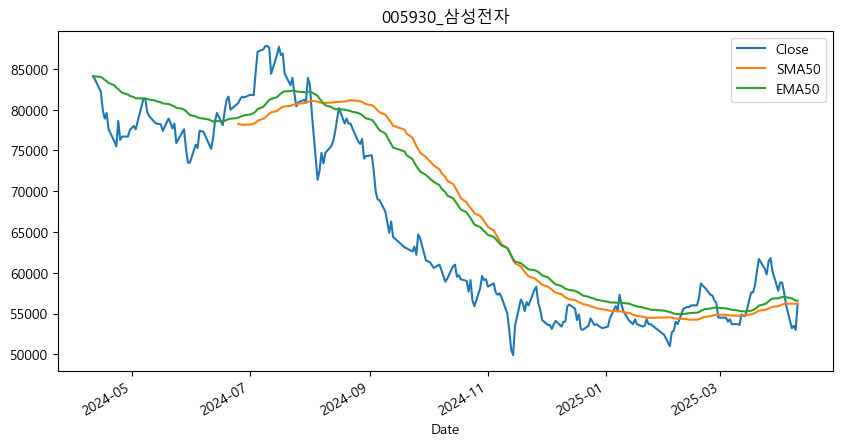

In [ ]:
# --------------------------------
# 최근 1년 50일 SMA, EMA
# Close
# Close 50 SMA
# Close 50 EMA
# --------------------------------



## 누적평균


<Axes: xlabel='Date'>

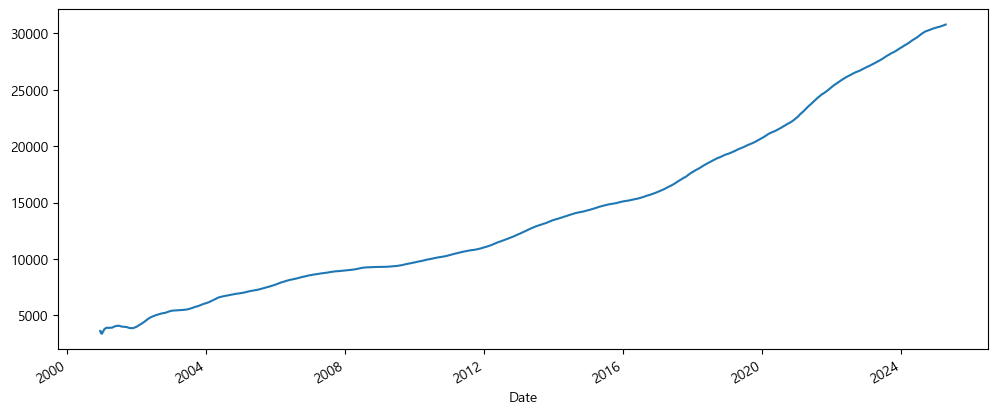

In [ ]:
# -------------------
# 전체 기간 누적 평균
# -------------------



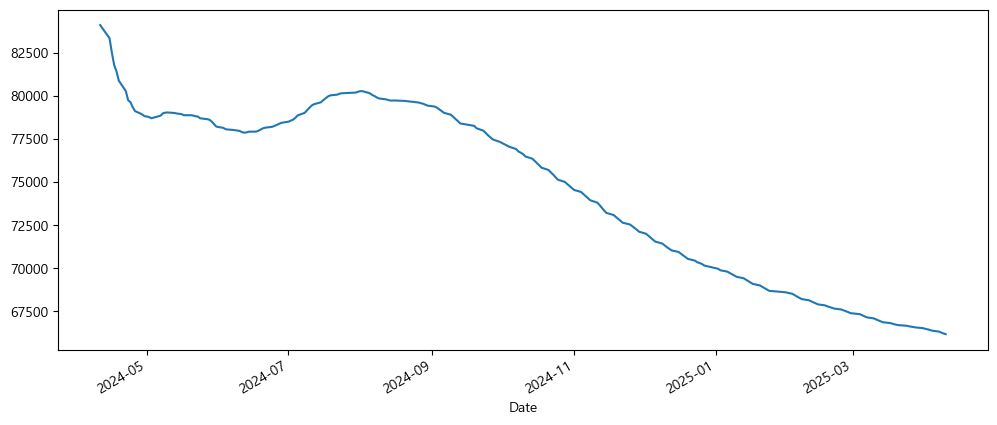

In [ ]:
# -------------------
# 최근 1년 누적평균
# -------------------



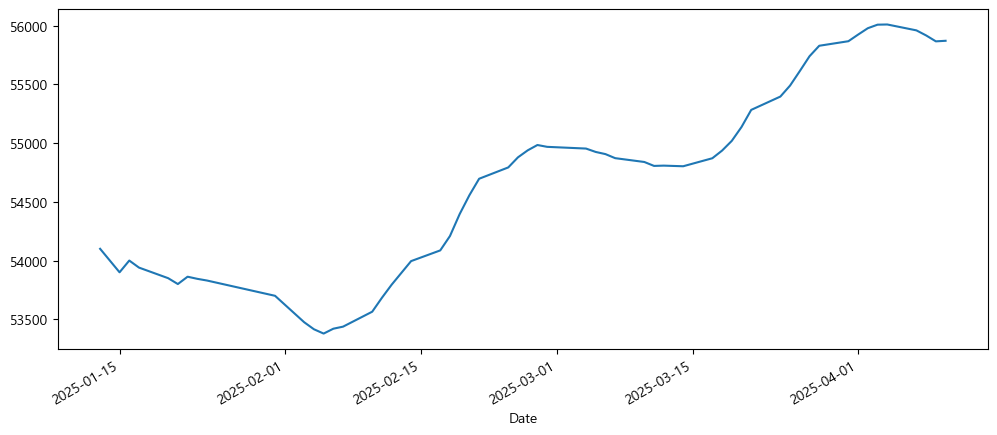

In [ ]:
# -------------------
# 최근 3개월 누적평균
# -------------------

## 볼린저 밴드
* 주식, 외환, 암호화폐 등의 금융시장에서 널리 사용되는 기술적 분석 도구
* 1980년대 초 존 볼린저(John Bollinger)가 개발
* 가격의 변동성을 측정하고 상대적인 고가와 저가 수준을 식별하는 데 도움을 줍니다.
* 볼린저밴드는 세 개의 선으로 구성
    * 중간밴드(Middle Band) : 일반적으로 20일 이동평균선(SMA) 사용
    * 상단밴드(Upper Band) : 중간밴드 + (20일 이동표준편차*2)
    * 하단밴드(Lower Band) : 중간밴드 - (20일 이동표준편차*2)
* 주요 특징과 용도
    * 변동성 측정 : 밴드의 폭이 넓을수록 시장 변동성이 높고, 좁을수록 변동성이 낮다.
    * 과매수/과매도 신호 : 가격이 상단 밴드에 닿으면 과매수(overbought) 상태로, 하단 밴드에 닿으면 과매도(oversold) 상태로 해석할 수 있다.
    * 추세 확인 : 강한 추세에서는 가격이 밴드 방향을 따라 지속적으로 움직인다.
    * 반전 신호 : 가격이 밴드를 벗어났다가 다시 안으로 들어오는 것은 잠재적인 반전 신호가 될 수 있다.
    

start_date: 2024-04-10


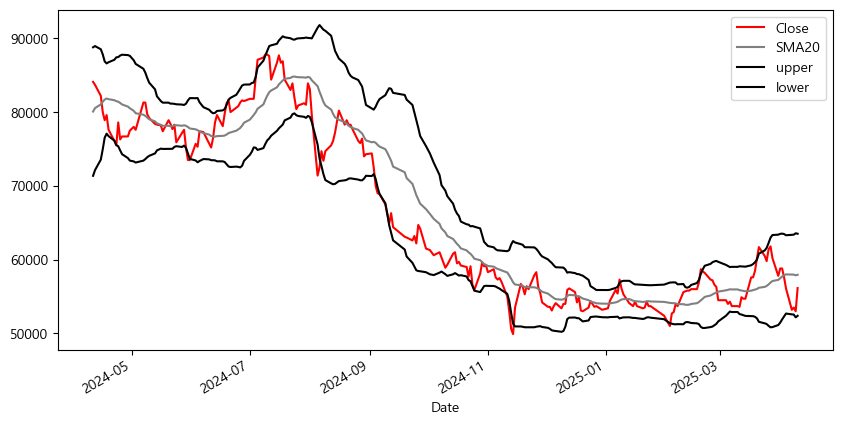